### Controllabilty Matrix Investigation

Since the Controllability Matrix has Rank of 2 which is less than state, the whole state-space become uncontrollable.

However, we can consider the Controllable subspace by calculating **the Image** of Controllability Matrix.

This code will visualize the Image of Controllability Matrix in both 3D (d, vp, vf) and 2D (d, vrel) with adjustable h (time headway -> parameter in ACC system).

Also, this code also illustrate the Kernel of Controllability Matrix, for checking uncontrollable area.

### Plot 2D

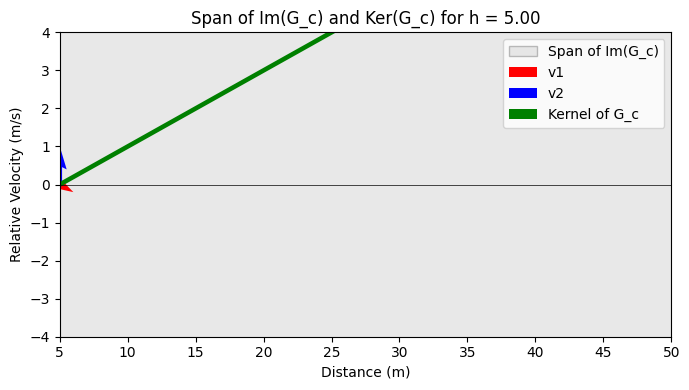

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk, messagebox

# Create main window
root = tk.Tk()
root.title("Interactive Span and Kernel Visualization")
root.geometry("800x600")
root.configure(bg='#f4f4f4')

# Initial parameter
h = 1.0
origin = np.array([5, 0])

# Matplotlib figure setup
fig, ax = plt.subplots(figsize=(7, 4))
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack(pady=10)

# Label to show current h value
h_value_label = ttk.Label(root, text=f"h = {h:.2f}", font=('Helvetica', 12))
h_value_label.pack(pady=(5, 0))

# Entry and update button
entry_frame = ttk.Frame(root)
entry_frame.pack(pady=10)

entry_label = ttk.Label(entry_frame, text="Enter h value:")
entry_label.pack(side="left", padx=(0, 5))

h_entry = ttk.Entry(entry_frame, width=10)
h_entry.insert(0, str(h))
h_entry.pack(side="left")

def update_plot():
    try:
        h_val = float(h_entry.get())
        if h_val == 0:
            raise ValueError("h cannot be zero.")
    except ValueError as e:
        messagebox.showerror("Invalid input", f"Please enter a valid non-zero number for h.\n\n{e}")
        return

    h_value_label.config(text=f"h = {h_val:.2f}")
    ax.clear()

    # Define vectors
    v1 = np.array([1, -1/h_val])
    v2 = np.array([0, 1])
    ker = np.array([h_val, 1])

    # Create parallelogram (span area)
    scale = 100
    p1 = origin - scale * v1 - scale * v2
    p2 = origin + scale * v1 - scale * v2
    p3 = origin + scale * v1 + scale * v2
    p4 = origin - scale * v1 + scale * v2
    polygon = np.array([p1, p2, p3, p4])
    ax.fill(polygon[:, 0], polygon[:, 1], color='lightgray', alpha=0.5, label='Span of Im(G_c)', edgecolor='gray')

    # Draw vectors
    ax.quiver(*origin, *v1, angles='xy', scale_units='xy', scale=1, color='r', label='v1')
    ax.quiver(*origin, *v2, angles='xy', scale_units='xy', scale=1, color='b', label='v2')
    ax.quiver(*origin, ker[0]*5, ker[1]*5, angles='xy', scale_units='xy', scale=1, color='g', label='Kernel of G_c')

    # Axes and labels
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xlim(5, 50)
    ax.set_ylim(-4, 4)
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Relative Velocity (m/s)')
    ax.set_title(f'Span of Im(G_c) and Ker(G_c) for h = {h_val:.2f}')
    ax.legend()
    fig.tight_layout()
    canvas.draw()

# Update button
update_button = ttk.Button(root, text="Update Plot", command=update_plot)
update_button.pack(pady=5)

# Initial plot
update_plot()

# Run GUI loop
root.mainloop()


### Plot 3D

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk, messagebox
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# Create main window
root = tk.Tk()
root.title("Interactive 3D Span and Kernel Visualization")
root.geometry("900x700")
root.configure(bg='#f4f4f4')

# Initial parameter
h = 1.0

# Matplotlib 3D figure setup
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack(pady=10)

# Label to show current h value
h_value_label = ttk.Label(root, text=f"h = {h:.2f}", font=('Helvetica', 12))
h_value_label.pack(pady=(5, 0))

# Entry and update button
entry_frame = ttk.Frame(root)
entry_frame.pack(pady=10)

entry_label = ttk.Label(entry_frame, text="Enter h value:")
entry_label.pack(side="left", padx=(0, 5))

h_entry = ttk.Entry(entry_frame, width=10)
h_entry.insert(0, str(h))
h_entry.pack(side="left")


def update_plot():
    try:
        h_val = float(h_entry.get())
        if h_val == 0:
            raise ValueError("h cannot be zero.")
    except ValueError as e:
        messagebox.showerror("Invalid input", f"Please enter a valid non-zero number for h.\n\n{e}")
        return

    h_value_label.config(text=f"h = {h_val:.2f}")
    ax.clear()

    # Define vectors
    v1 = np.array([0, 1, 0])
    v2 = np.array([1, 0, 1 / h_val])
    ker = np.array([h_val, 1, 0])
    origin = np.zeros(3)

    # Grid for span surface
    s = np.linspace(-3, 3, 10)
    t = np.linspace(-3, 3, 10)
    S, T = np.meshgrid(s, t)
    X = S * v1[0] + T * v2[0]
    Y = S * v1[1] + T * v2[1]
    Z = S * v1[2] + T * v2[2]
    ax.plot_surface(X, Y, Z, alpha=0.3, color='lightgray')

    # Draw vectors
    ax.quiver(*origin, *v1, color='r', label='v1')
    ax.quiver(*origin, *v2, color='b', label='v2')
    ax.quiver(*origin, *ker, color='g', label='Kernel of G_c')

    # Draw kernel line
    ker_span = np.linspace(-2, 2, 20)
    KER_X = ker_span * ker[0]
    KER_Y = ker_span * ker[1]
    KER_Z = ker_span * ker[2]
    ax.plot(KER_X, KER_Y, KER_Z, color='g')

    # Axes and labels
    axis_length = 2
    ax.quiver(0, 0, 0, axis_length, 0, 0, color='black', linewidth=1)
    ax.quiver(0, 0, 0, 0, axis_length, 0, color='black', linewidth=1)
    ax.quiver(0, 0, 0, 0, 0, axis_length, color='black', linewidth=1)

    ax.text(axis_length, 0, 0, 'd', color='black', fontsize=12)
    ax.text(0, axis_length, 0, 'vp', color='black', fontsize=12)
    ax.text(0, 0, axis_length, 'vf', color='black', fontsize=12)

    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    ax.set_xlabel('d')
    ax.set_ylabel('vp')
    ax.set_zlabel('vf')
    ax.set_title(f'Span of Im(G_c) and Ker(G_c) for h = {h_val:.2f}')
    ax.legend()
    fig.tight_layout()
    canvas.draw()


# Update button
update_button = ttk.Button(root, text="Update Plot", command=update_plot)
update_button.pack(pady=5)

# Initial plot
update_plot()

# Run GUI loop
root.mainloop()
